In [24]:
import zipfile
import os
import random
import shutil
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt


# Load data from Google Drive

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
total_files = 480
output_dir = "/content/drive/MyDrive/Speech_Emotion_Recogntion/combined_dataset"

## ESD

In [27]:
esd_path = '/content/drive/MyDrive/Speech_Emotion_Recogntion/audio_src/ESD.zip'

with zipfile.ZipFile(esd_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [44]:
esd = '/content/Emotion Speech Dataset'  # Remplacez par le chemin réel du dataset ESD

# Nombre spécifique de fichiers à récupérer par émotion
emotion_files_count = {
    "Angry": 1000,
    "Sad": 1000,
    "Surprise": 114,
    "Neutral": 68,
    "Happy": 68
}

# Fonction pour récupérer aléatoirement des fichiers par émotion
def get_random_files(emotion_path, n):
    """Récupère n fichiers aléatoires dans le dossier d'une émotion."""
    files = [f for f in os.listdir(emotion_path) if f.endswith(".wav")]
    return random.sample(files, min(len(files), n))

# Traitement du dataset
for emotion, count in emotion_files_count.items():
    emotion_files = []
    emotion_index = 1  # Index indépendant pour chaque émotion
    for speaker_dir in os.listdir(esd):
        emotion_path = os.path.join(esd, speaker_dir, emotion)
        print(emotion_path)
        if os.path.isdir(emotion_path):
            # Récupérer tous les fichiers pour cette émotion de manière récursive
            for root, dirs, files in os.walk(emotion_path):
                if root.endswith('.DS_Store') or any(dir.startswith('.') for dir in dirs):
                    continue
                for file in files:
                    if file.lower().endswith('.wav'):
                        emotion_files.append(os.path.join(root, file))

    # Renommage et copie des fichiers
    for file_name in emotion_files:
        src_file = os.path.join(emotion_path, file_name)
        dst_file = os.path.join(output_dir, f"ESD_{emotion.lower()}_{emotion_index}.wav")
        shutil.copy(src_file, dst_file)
        emotion_index += 1

print("Fichiers ESD sélectionnés, renommés et enregistrés dans Google Drive.")

/content/Emotion Speech Dataset/0016/Angry
/content/Emotion Speech Dataset/0013/Angry
/content/Emotion Speech Dataset/0015/Angry
/content/Emotion Speech Dataset/0014/Angry
/content/Emotion Speech Dataset/0020/Angry
/content/Emotion Speech Dataset/0011/Angry
/content/Emotion Speech Dataset/0017/Angry
/content/Emotion Speech Dataset/0018/Angry
/content/Emotion Speech Dataset/.DS_Store/Angry
/content/Emotion Speech Dataset/0019/Angry
/content/Emotion Speech Dataset/0012/Angry
/content/Emotion Speech Dataset/0016/Sad
/content/Emotion Speech Dataset/0013/Sad
/content/Emotion Speech Dataset/0015/Sad
/content/Emotion Speech Dataset/0014/Sad
/content/Emotion Speech Dataset/0020/Sad
/content/Emotion Speech Dataset/0011/Sad
/content/Emotion Speech Dataset/0017/Sad
/content/Emotion Speech Dataset/0018/Sad
/content/Emotion Speech Dataset/.DS_Store/Sad
/content/Emotion Speech Dataset/0019/Sad
/content/Emotion Speech Dataset/0012/Sad
/content/Emotion Speech Dataset/0016/Surprise
/content/Emotion Spe

## RAVDESS

In [45]:
ravdess_path = '/content/drive/MyDrive/Speech_Emotion_Recogntion/audio_src/RAVDESS.zip'

with zipfile.ZipFile(ravdess_path, 'r') as zip_ref:
    zip_ref.extractall('/content/RAVDESS/')

In [61]:
ravdess_path = "/content/RAVDESS"  # Remplacez par le chemin réel du dataset RAVDESS

# Dictionnaire des émotions avec le nombre exact de fichiers à récupérer
emotion_files_count = {
    "angry": 1000,
    "sad": 1000,
    "surprise": 1000,
    "happy": 1000,
    "disgust": 1000,
    "neutral": 1000,
    "fearful": 1000
}

# Dictionnaire des codes d'émotions
emotions_map = {
    "01": "neutral",
    "02": "calm",  # Ignoré
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprise"
}

# Fonction pour récupérer aléatoirement des fichiers par émotion
def get_files_by_emotion(actor_dir, emotion_code, n):
    """Récupère aléatoirement n fichiers correspondant à une émotion."""
    files = [f for f in os.listdir(actor_dir) if f.endswith(".wav") and f.split("-")[2] == emotion_code]
    return random.sample(files, min(len(files), n))

# Traitement du dataset
for emotion_code, emotion_name in emotions_map.items():
    if emotion_name == "calm":
        continue  # Ignore l'émotion "calm"

    # Récupérer le nombre de fichiers à sélectionner pour chaque émotion
    count = emotion_files_count.get(emotion_name, 0)
    if count == 0:
        continue  # Ignore les émotions sans fichiers à récupérer

    emotion_files = []
    emotion_index = 1  # Index indépendant pour chaque émotion
    selected_files = []  # Liste des fichiers sélectionnés pour l'émotion
    for actor_dir in os.listdir(ravdess_path):
        actor_path = os.path.join(ravdess_path, actor_dir)
        if os.path.isdir(actor_path):
            # Récupérer des fichiers pour cette émotion dans le dossier actuel
            emotion_files = get_files_by_emotion(actor_path, emotion_code, count - len(selected_files))
            selected_files.extend([(actor_path, f) for f in emotion_files])

    # Renommage et copie des fichiers
    for actor_path, file_name in selected_files:
        src_file = os.path.join(actor_path, file_name)
        dst_file = os.path.join(output_dir, f"RAVDESS_{emotion_name}_{emotion_index}.wav")
        shutil.copy(src_file, dst_file)
        emotion_index += 1

print("Fichiers RAVDESS sélectionnés, renommés et enregistrés dans Google Drive.")

Fichiers RAVDESS sélectionnés, renommés et enregistrés dans Google Drive.


## TESS

In [47]:
tess_path = '/content/drive/MyDrive/Speech_Emotion_Recogntion/audio_src/TESS.zip'

with zipfile.ZipFile(tess_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [48]:
tess_path = "/content/TESS Toronto emotional speech set data"  # Remplacez par le chemin réel

# Nombre spécifique de fichiers à récupérer par émotion
emotion_files_count = {
    "angry": 1000,
    "sad": 1000,
    "surprise": 1000,
    "happy": 1000,
    "disgust": 1000,
    "neutral": 1000,
    "fearful": 1000
}

# Paramètres de remplacement des émotions
emotion_replacements = {
    "fear": "fearful",
    "surprise": "surprise",
    "sad": "sad",
    "happy": "happy",
    "angry": "angry",
    "disgust": "disgust",
    "neutral": "neutral"
}

# Fonction pour récupérer aléatoirement des fichiers d'un dossier
def get_random_files(emotion_path, n):
    """Récupère n fichiers aléatoires dans un dossier donné."""
    files = [f for f in os.listdir(emotion_path) if f.endswith(".wav")]
    return random.sample(files, min(len(files), n))

# Traitement du dataset
for folder_name in os.listdir(tess_path):
    folder_path = os.path.join(tess_path, folder_name)
    if os.path.isdir(folder_path):
        # Identifier l'émotion basée sur le nom du dossier
        raw_emotion = folder_name.split("_")[-1].lower()
        emotion_name = emotion_replacements.get(raw_emotion, None)
        if not emotion_name:
            print(f"Émotion non reconnue dans {folder_name}.")
            continue

        # Récupérer le nombre de fichiers pour cette émotion à partir du dictionnaire
        files_to_select = emotion_files_count.get(emotion_name, 0)
        if files_to_select == 0:
            print(f"Pas de fichiers à sélectionner pour l'émotion {emotion_name}.")
            continue

        emotion_files = get_random_files(folder_path, files_to_select)
        emotion_index = 1  # Index indépendant pour chaque émotion

        # Renommage et copie des fichiers
        for file_name in emotion_files:
            src_file = os.path.join(folder_path, file_name)
            dst_file = os.path.join(output_dir, f"TESS_{emotion_name}_{emotion_index}.wav")
            shutil.copy(src_file, dst_file)
            emotion_index += 1

print("Fichiers TESS sélectionnés, renommés et enregistrés dans Google Drive.")

Émotion non reconnue dans YAF_pleasant_surprised.
Fichiers TESS sélectionnés, renommés et enregistrés dans Google Drive.


## CREMA-D

In [49]:
crema_path = '/content/drive/MyDrive/Speech_Emotion_Recogntion/audio_src/CREMA-D.zip'

with zipfile.ZipFile(crema_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [51]:
crema_d_path = "/content/AudioWAV"  # Remplacez par le chemin réel

# Nombre spécifique de fichiers à récupérer par émotion
emotion_files_count = {
    "angry": 1000,
    "sad": 1000,
    "happy": 1000,
    "disgust": 1000,
    "neutral": 1000,
    "fearful": 1000
}

# Paramètres de remplacement des émotions
emotion_replacements = {
    "ANG": "angry",
    "DIS": "disgust",
    "NEU": "neutral",
    "SAD": "sad",
    "FEA": "fearful",
    "HAP": "happy"
}

# Fonction pour récupérer des fichiers d'émotion
def get_random_files_by_emotion(emotion_path, emotion_code, n):
    """Récupère n fichiers aléatoires correspondant à une émotion donnée."""
    files = [f for f in os.listdir(emotion_path) if f.endswith(".wav") and f.split("_")[2] == emotion_code]
    return random.sample(files, min(len(files), n))

# Traitement du dataset
for emotion_code, emotion_name in emotion_replacements.items():
    # Récupérer le nombre spécifique de fichiers à sélectionner pour cette émotion
    files_to_select = emotion_files_count.get(emotion_name, 0)
    if files_to_select == 0:
        print(f"Pas de fichiers à sélectionner pour l'émotion {emotion_name}.")
        continue

    emotion_files = []
    emotion_index = 1  # Index indépendant pour chaque émotion
    selected_files = []  # Liste des fichiers sélectionnés pour l'émotion

    # Parcourir les fichiers et sélectionner les fichiers correspondant à l'émotion
    for file_name in os.listdir(crema_d_path):
        file_path = os.path.join(crema_d_path, file_name)
        if os.path.isfile(file_path):
            if file_name.split("_")[2] == emotion_code:
                selected_files.append(file_name)
            if len(selected_files) >= files_to_select:
                break

    # Vérification qu'on a assez de fichiers pour l'émotion
    if len(selected_files) < files_to_select:
        print(f"Pas assez de fichiers pour l'émotion {emotion_name}.")
        continue

    # Renommage et copie des fichiers
    for file_name in selected_files:
        src_file = os.path.join(crema_d_path, file_name)
        dst_file = os.path.join(output_dir, f"CREMA-D_{emotion_name}_{emotion_index}.wav")
        shutil.copy(src_file, dst_file)
        emotion_index += 1

print("Fichiers CREMA-D sélectionnés, renommés et enregistrés dans Google Drive.")


Fichiers CREMA-D sélectionnés, renommés et enregistrés dans Google Drive.


## SAVEE

In [52]:
savee_path = '/content/drive/MyDrive/Speech_Emotion_Recogntion/audio_src/SAVEE.zip'

with zipfile.ZipFile(savee_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [53]:
savee_path = "/content/ALL"

# Paramètres
emotion_replacements = {
    "a": "angry",
    "f": "fearful",
    "h": "happy",
    "n": "neutral",
    "d": "disgust",
    "sa": "sad",
    "su": "surprise"
}

# Récupération de tous les fichiers
all_files = [f for f in os.listdir(savee_path) if f.endswith(".wav")]
emotion_index = 1  # Index pour les fichiers renommés

# Traitement de chaque fichier
for file_name in all_files:
    # Récupérer l'émotion en fonction des codes dans le nom de fichier
    emotion_code = file_name.split("_")[1][0:2]  # Prendre les deux premières lettres pour les cas 'sa' et 'su'
    if emotion_code != "su" and emotion_code != "sa":
        emotion_code = emotion_code[0]

    # Vérifier si le code existe dans les émotions
    if emotion_code not in emotion_replacements:
        print(f"Émotion inconnue pour le fichier : {file_name}")
        continue

    emotion_name = emotion_replacements[emotion_code]  # Nom de l'émotion à partir du code

    # Définir le chemin source et destination
    src_file = os.path.join(savee_path, file_name)
    dst_file = os.path.join(output_dir, f"SAVEE_{emotion_name}_{emotion_index}.wav")

    # Copier le fichier avec le nouveau nom
    shutil.copy(src_file, dst_file)

    emotion_index += 1

print("Tous les fichiers SAVEE ont été renommés et enregistrés dans Google Drive.")

Tous les fichiers SAVEE ont été renommés et enregistrés dans Google Drive.


## JL CORPUS

In [54]:
jlcorpus_path = '/content/drive/MyDrive/Speech_Emotion_Recogntion/audio_src/JL_CORPUS.zip'

with zipfile.ZipFile(jlcorpus_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [55]:
jl_corpus_path = "/content/raw jl corpus (unchecked and unannotated)/JL(wav+txt)"  # Remplacez par le chemin réel

# Paramètres
emotion_replacements = {
    "angry": "angry",
    "neutral": "neutral",
    "happy": "happy"
}

# Nombre de fichiers à sélectionner pour chaque émotion
files_per_emotion = 68

# Fonction pour récupérer des fichiers d'émotion
def get_random_files_by_emotion(emotion_code, n):
    """Récupère n fichiers aléatoires correspondant à une émotion donnée."""
    files = [f for f in os.listdir(jl_corpus_path) if f.endswith(".wav") and f.split("_")[1] == emotion_code]
    return random.sample(files, min(len(files), n))

# Traitement des émotions
emotion_index = 1  # Index pour les fichiers renommés
for emotion_code, emotion_name in emotion_replacements.items():
    # Récupérer les fichiers correspondant à cette émotion
    emotion_files = get_random_files_by_emotion(emotion_code, files_per_emotion)

    # Renommage et copie des fichiers
    for file_name in emotion_files:
        src_file = os.path.join(jl_corpus_path, file_name)
        dst_file = os.path.join(output_dir, f"JL_{emotion_name}_{emotion_index}.wav")
        shutil.copy(src_file, dst_file)
        emotion_index += 1

print("Fichiers JL Corpus sélectionnés, renommés et enregistrés dans Google Drive.")

Fichiers JL Corpus sélectionnés, renommés et enregistrés dans Google Drive.


In [62]:
emotion_counts = defaultdict(int)

# Parcours des fichiers dans le dossier
for file_name in os.listdir(output_dir):
    if file_name.endswith(".wav"):
        # Extraction de l'émotion à partir du nom du fichier
        parts = file_name.split("_")
        if len(parts) > 1:  # Vérification que le nom est bien structuré
            emotion = parts[1]
            emotion_counts[emotion] += 1

# Affichage des résultats
print("Nombre de fichiers par émotion dans le dossier :")
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count}")

Nombre de fichiers par émotion dans le dossier :
angry: 5020
sad: 4952
surprise: 3952
neutral: 4984
happy: 5020
disgust: 1452
fearful: 1452


In [63]:
# Initialisation d'un dictionnaire pour comptabiliser les datasets
dataset_counts = Counter()

# Parcourir tous les fichiers dans le dossier output_dir
for file_name in os.listdir(output_dir):
    if file_name.endswith(".wav"):
        # Extraire le nom du dataset depuis le nom du fichier
        # Par exemple, "RAVDESS_angry_1.wav" donne "RAVDESS"
        dataset_name = file_name.split("_")[0]

        # Ajouter à notre compteur
        dataset_counts[dataset_name] += 1

# Afficher la répartition des datasets
for dataset, count in dataset_counts.items():
    print(f"{dataset}: {count} fichiers")

ESD: 17500 fichiers
TESS: 1400 fichiers
CREMA-D: 6000 fichiers
SAVEE: 480 fichiers
JL: 204 fichiers
RAVDESS: 1248 fichiers


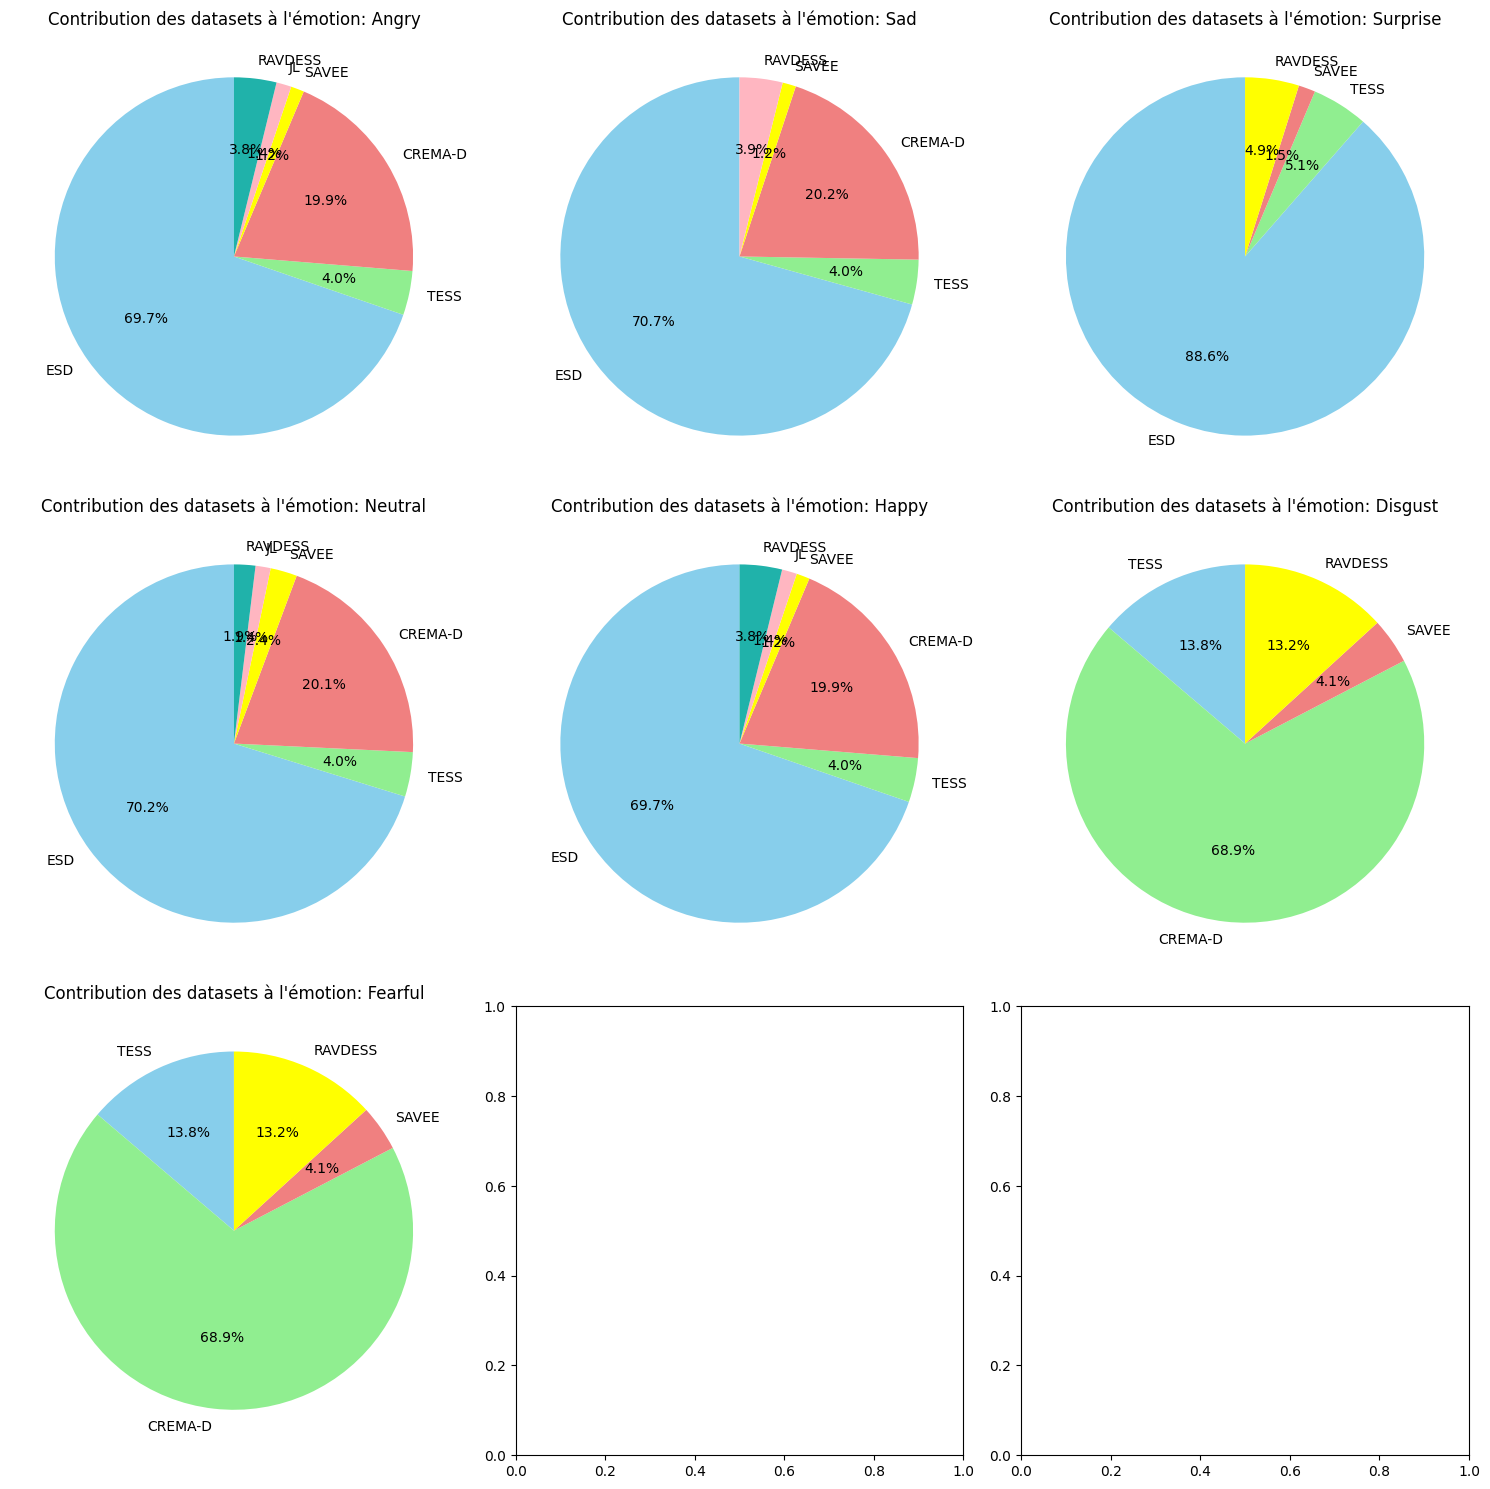

In [64]:
# Initialisation d'un dictionnaire pour stocker les contributions de chaque dataset par émotion
emotion_contributions = defaultdict(lambda: defaultdict(int))

# Parcourir tous les fichiers dans le dossier output_dir
for file_name in os.listdir(output_dir):
    if file_name.endswith(".wav"):
        # Extraire le nom du dataset (par exemple, "JL" pour JL Corpus)
        dataset_name = file_name.split("_")[0]

        # Extraire l'émotion (par exemple, "angry", "neutral", "happy")
        emotion_name = file_name.split("_")[1]

        # Ajouter la contribution du dataset à l'émotion correspondante
        emotion_contributions[emotion_name][dataset_name] += 1

# Calculer le nombre de lignes et de colonnes nécessaires
num_emotions = len(emotion_contributions)
num_columns = 3  # 3 diagrammes par ligne
num_rows = (num_emotions + num_columns - 1) // num_columns  # Calcul dynamique du nombre de lignes

# Création des graphiques pour chaque émotion avec des diagrammes en camembert
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))  # Ajuster la taille en fonction du nombre de lignes
axes = axes.flatten()  # Pour itérer facilement sur les axes

# Création du graphique pour chaque émotion
for idx, (emotion, datasets) in enumerate(emotion_contributions.items()):
    # Extraire les données pour chaque dataset pour cette émotion
    datasets_names = list(datasets.keys())
    counts = list(datasets.values())

    # Création du diagramme en camembert
    axes[idx].pie(counts, labels=datasets_names, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'yellow', 'lightpink', 'lightseagreen'])
    axes[idx].set_title(f'Contribution des datasets à l\'émotion: {emotion.capitalize()}')

# Ajustement pour ne pas chevaucher les titres
plt.tight_layout()
plt.show()